In [57]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  

In [58]:
# import some data to play with
df = pd.read_csv('Fraud_check.csv')  
df.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [59]:
df.tail(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [60]:
#Creating dummy variables for below columns
df=pd.get_dummies(df,columns=["Undergrad","Marital.Status","Urban"],drop_first=True)

In [61]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [62]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [63]:
df=pd.get_dummies(df,columns=["TaxInc"],drop_first=True)

In [64]:
df.head(5)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


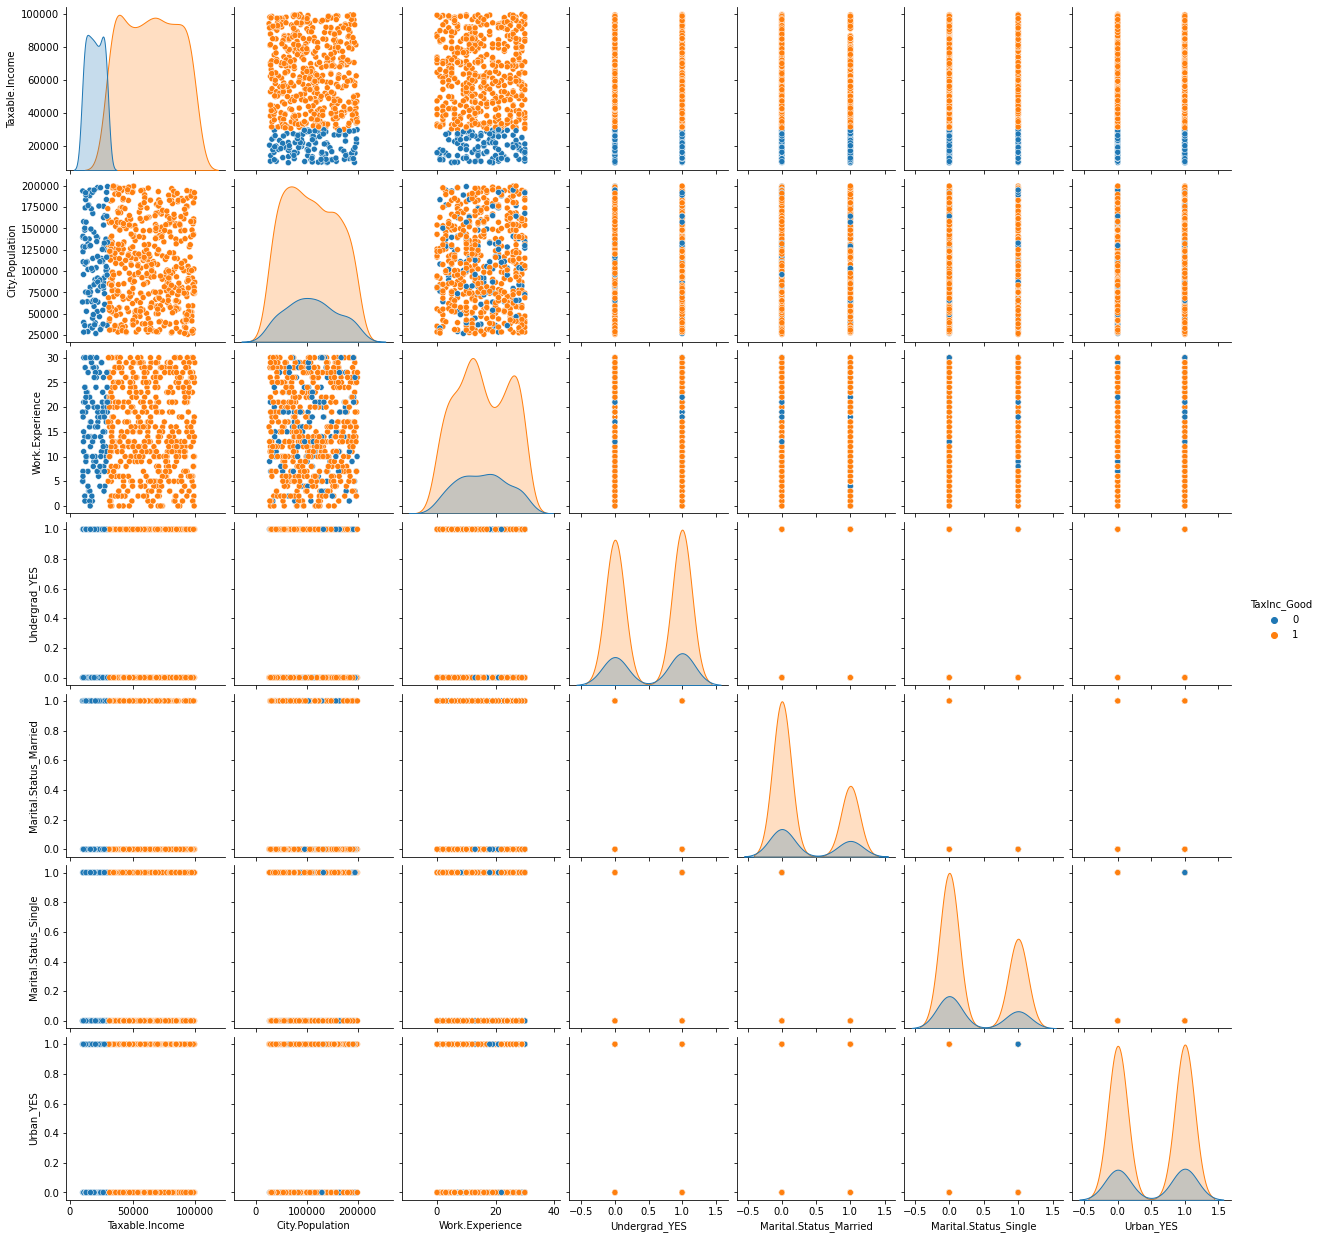

In [65]:
import seaborn as sns
sns.pairplot(data=df, hue="TaxInc_Good")

In [66]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [67]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df['TaxInc_Good']= label_encoder.fit_transform(df['TaxInc_Good'])

In [68]:
df['TaxInc_Good']

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TaxInc_Good, Length: 600, dtype: int64

In [69]:
X=df.iloc[:,0:7]
y=df['TaxInc_Good']

In [70]:
X

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [71]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TaxInc_Good, Length: 600, dtype: int64

In [72]:
df.TaxInc_Good.value_counts()

1    476
0    124
Name: TaxInc_Good, dtype: int64

In [73]:
colnames = list(df.columns)
colnames

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

In [74]:
# Splitting data into training and testing data set
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=42) 

# Decision Tree model

# Building Decision Tree Classifier using Entropy Criteria

In [75]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
clf=model.fit(X_train,y_train) 

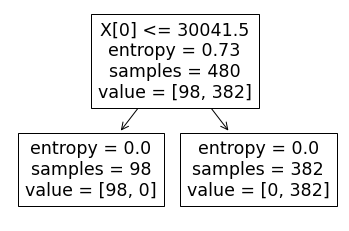

In [76]:
#PLot the decision tree
tree.plot_tree(model);

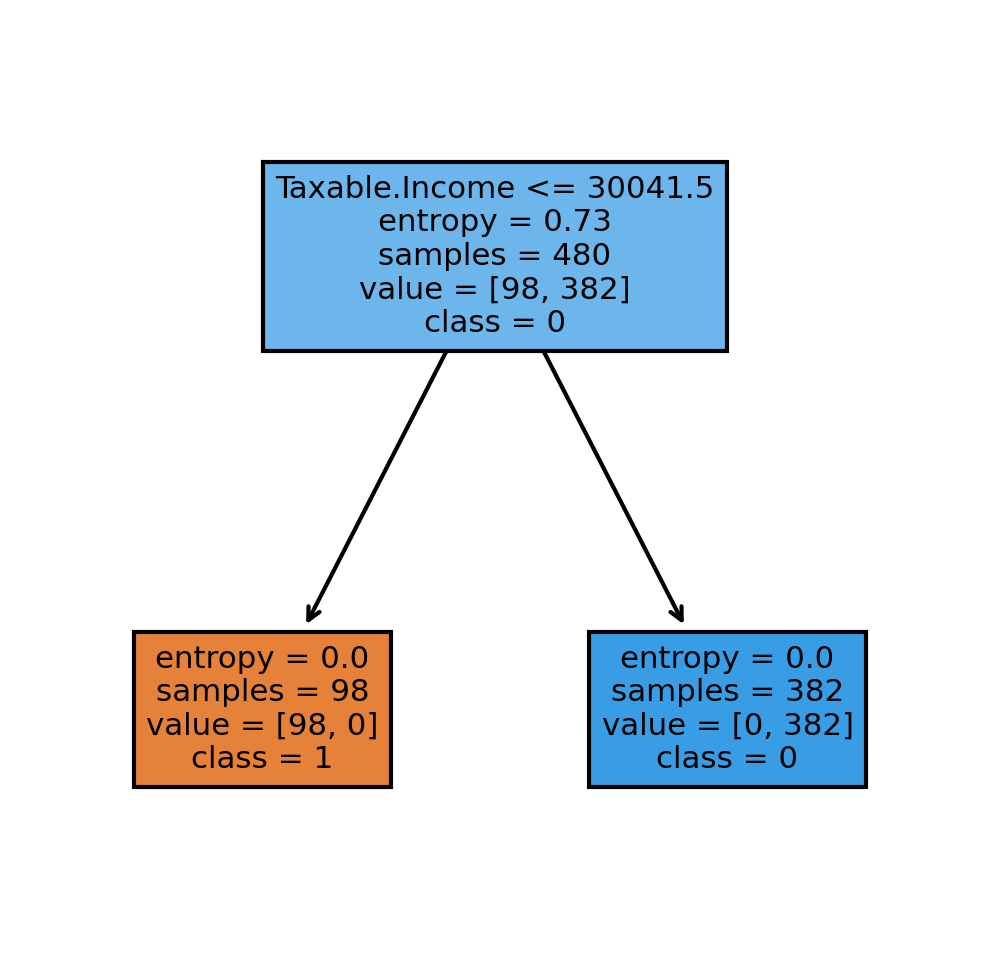

In [77]:
fn=['Taxable.Income','City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [78]:
text = tree.export_text(model,max_depth=2)  
print(text) 

|--- feature_0 <= 30041.50
|   |--- class: 0
|--- feature_0 >  30041.50
|   |--- class: 1



In [79]:
model.feature_importances_ 

array([1., 0., 0., 0., 0., 0., 0.])

In [80]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

1    94
0    26
dtype: int64

In [81]:
preds

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [82]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
TaxInc_Good,,
0,26,0
1,0,94


In [83]:
# Accuracy 
np.mean(preds==y_test)

1.0

# Building Decision Tree Classifier (CART) using Gini Criteria

In [84]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [85]:
model_gini.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [86]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==y_test) 

1.0

In [87]:
model.feature_importances_ 

array([1., 0., 0., 0., 0., 0., 0.])

# Decision Tree Regression Example

In [88]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor  

In [89]:
array = df.values
X = array[:,0:7] 
y = array[:,7] 
X

array([[ 68833,  50047,     10, ...,      0,      1,      1],
       [ 33700, 134075,     18, ...,      0,      0,      1],
       [ 36925, 160205,     30, ...,      1,      0,      1],
       ...,
       [ 47334, 154058,      0, ...,      0,      0,      1],
       [ 98592, 180083,     17, ...,      1,      0,      0],
       [ 96519, 158137,     16, ...,      0,      0,      0]], dtype=int64)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [91]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train) 

DecisionTreeRegressor(max_depth=3)

In [92]:
#Find the testing accuracy
model.score(X_test,y_test)

1.0

In [93]:
#Find the training accuracy
model.score(X_train, y_train)  

1.0